In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df = pd.read_csv("C:/Users/akash/Downloads/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# if we see in  the describe() statistics min value is zero then their is a problem in a dataset

In [8]:
# then replacing zero values with the mean of the column

df['Pregnancies'] = df['Pregnancies'].replace(0,df['Pregnancies'].mean())

df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())

df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())

df['BMI'] = df['BMI'].replace(0,df['BMI'].mean()) 

df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].mean())

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

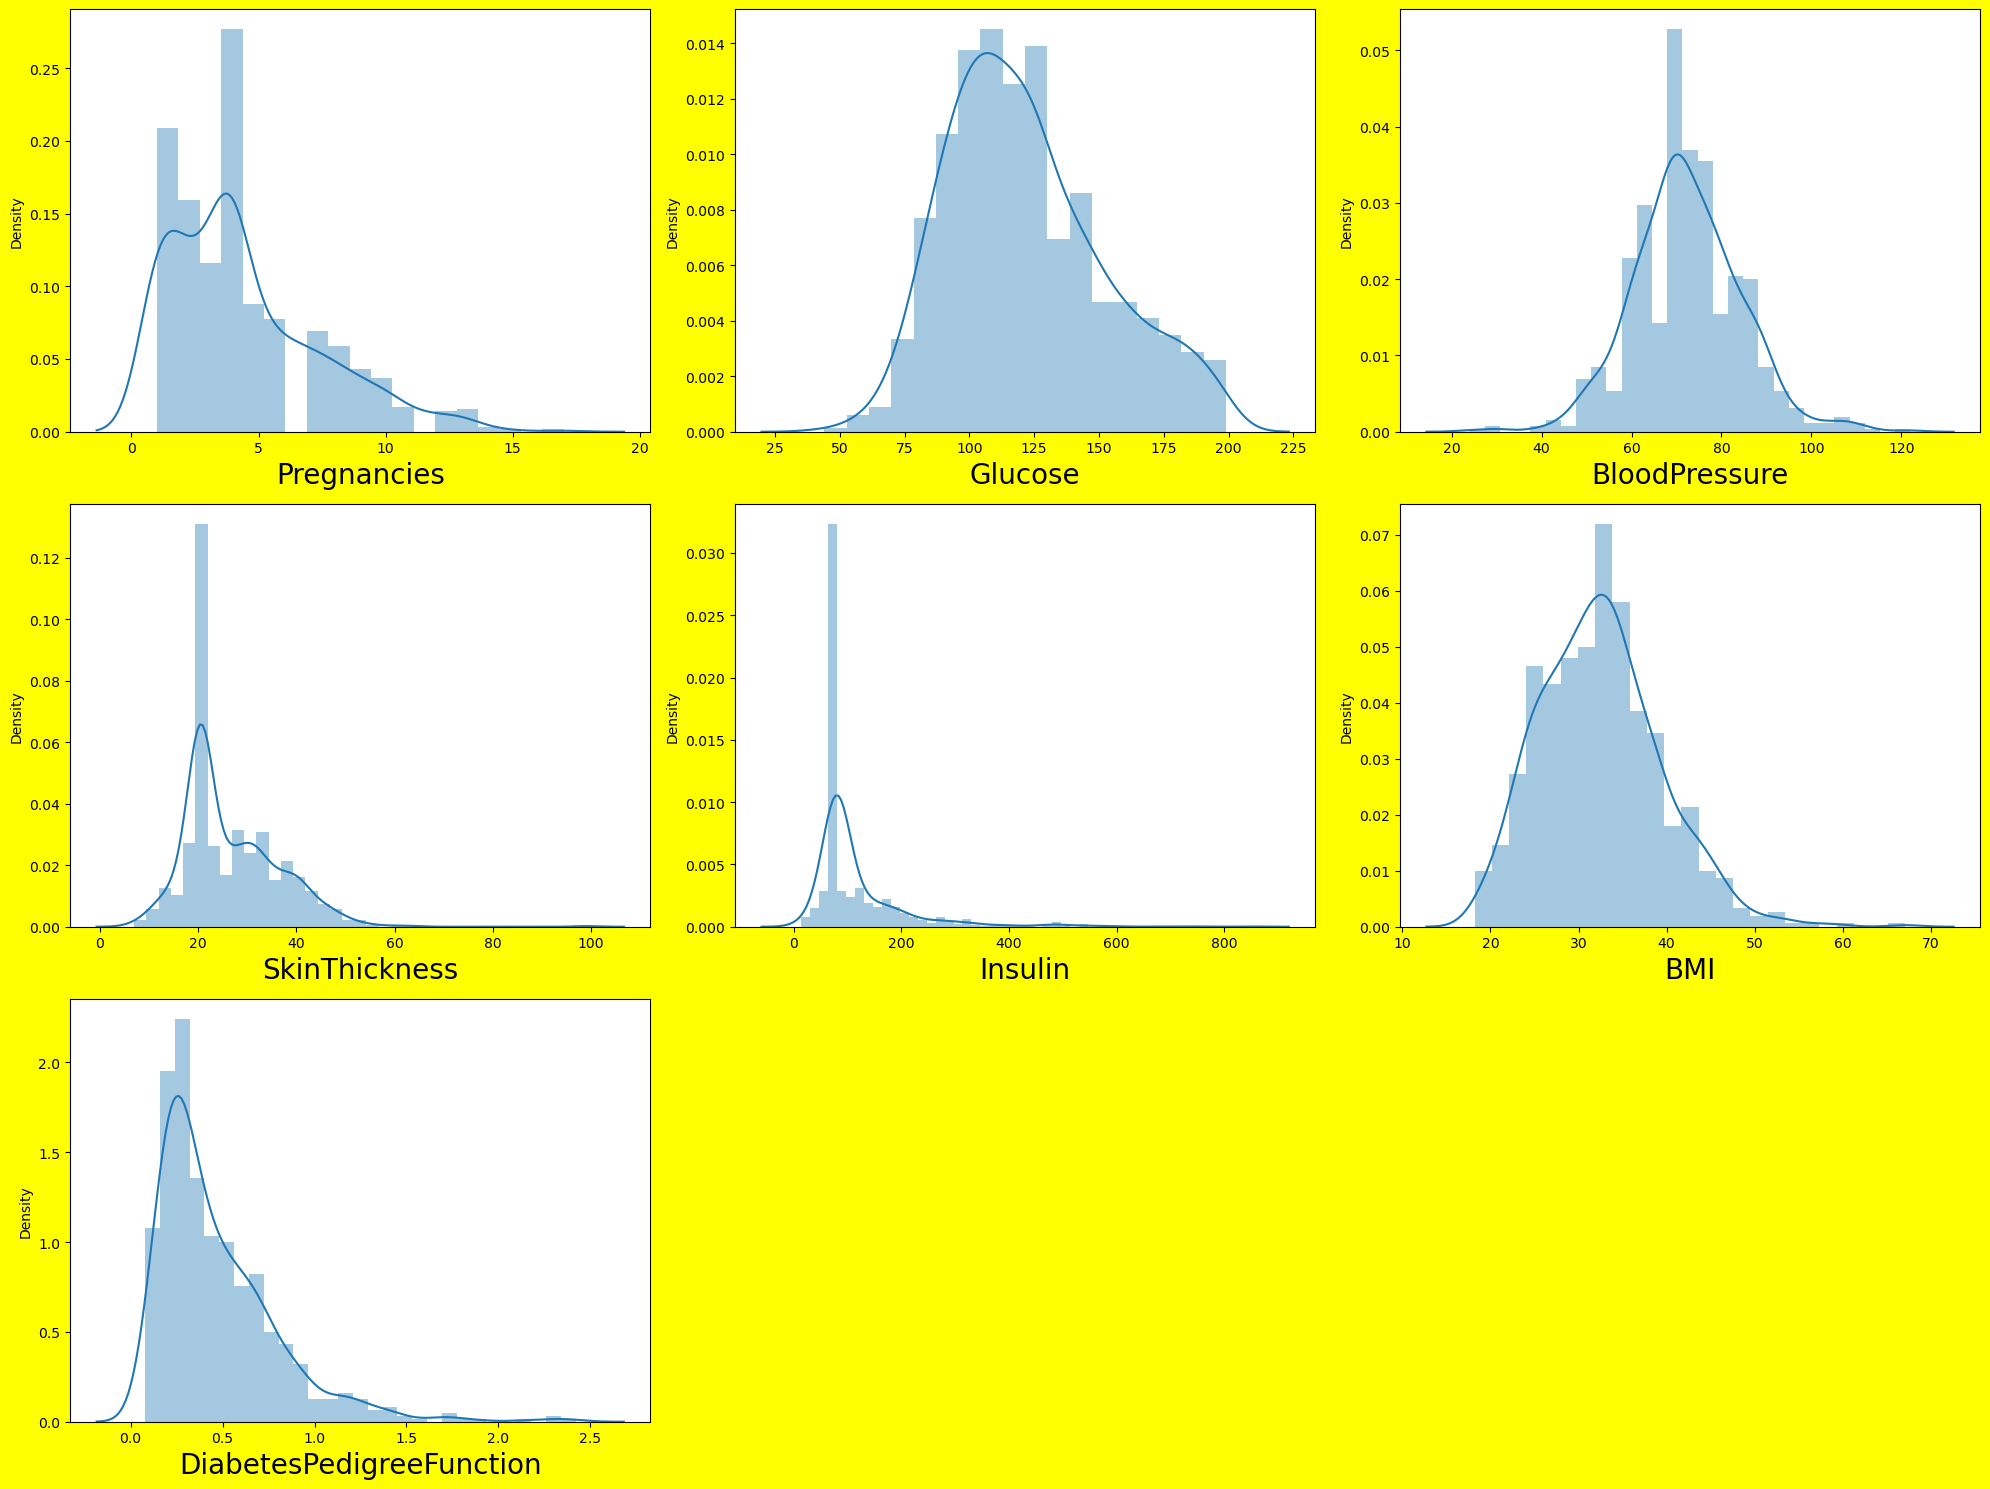

In [10]:
#Data distribution

plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1   
plt.tight_layout() 

# To remove outliers using box plot

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\akash\anaconda3\lib\si

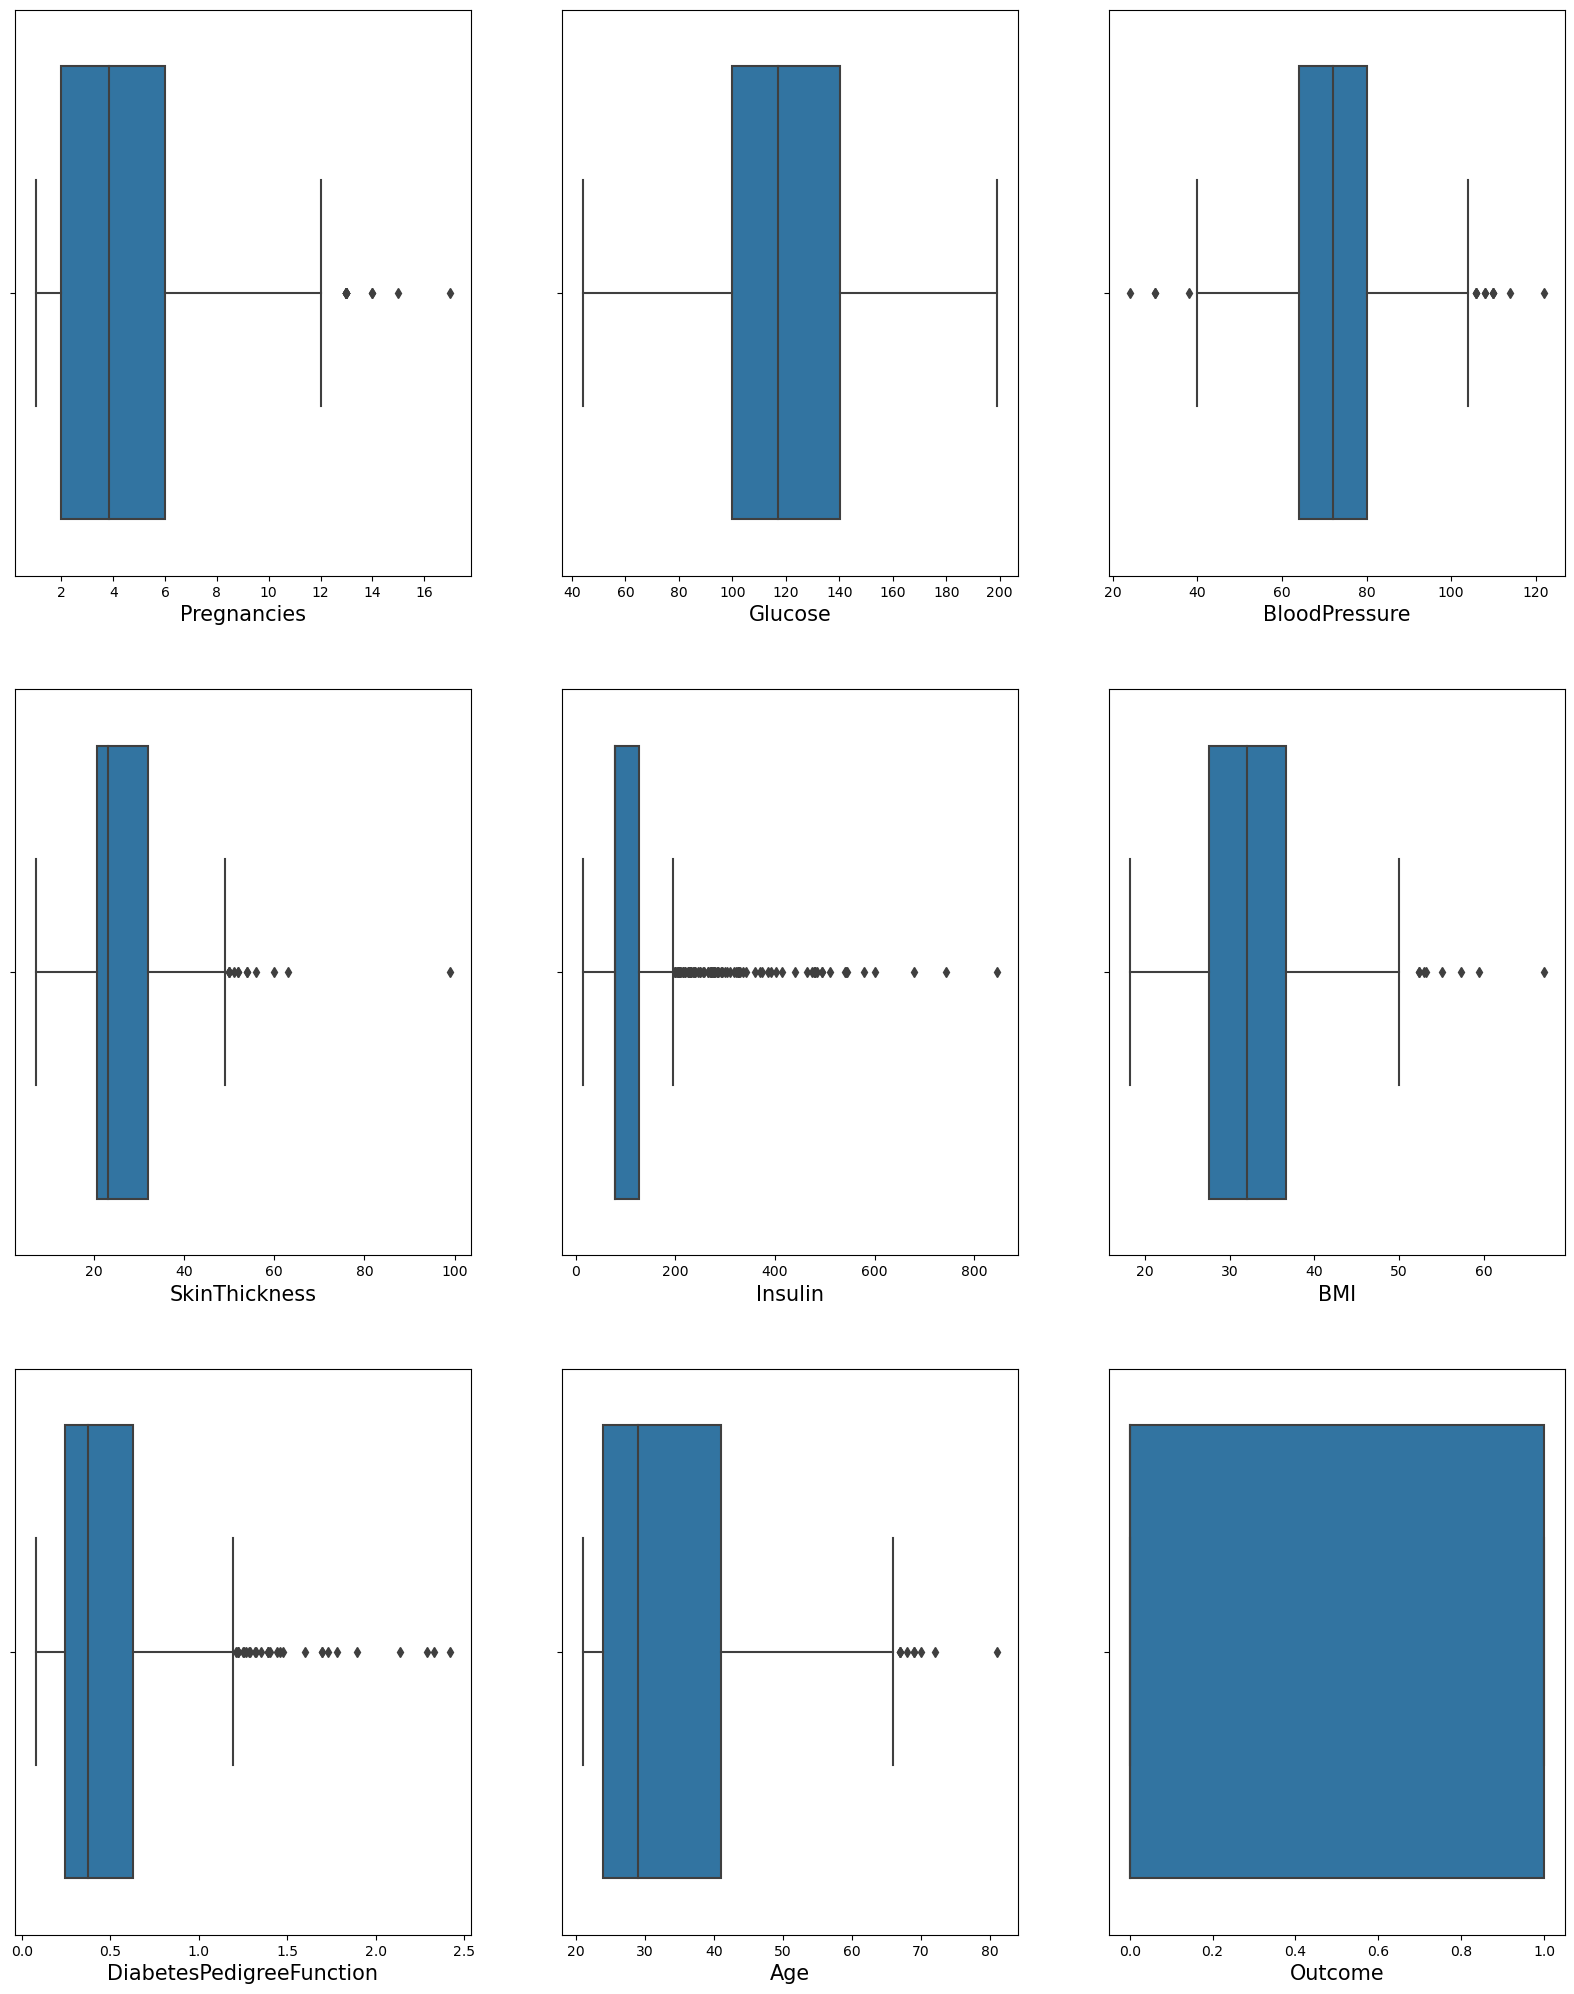

In [11]:
plt.figure(figsize=(20,25))
graph = 1

for column in df:
    if graph <=9:
        plt.subplot(3,3,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 15)
    graph+=1
plt.show()    

In [12]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

In [13]:
q1

Pregnancies                  2.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64

In [14]:
q3

Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

# Outlier Detection formula 

higher side ===> Q3 + (1.5 * IQR)

lower side ===> Q1 - (1.5 * IQR)

In [15]:
#Validating one outlier
preg_high = (q3.Pregnancies + (1.5 * iqr.Pregnancies))
print(preg_high)


#check the indexes which have higher values
np_index = np.where(df['Pregnancies'] > preg_high)

#drop the index which we found in the above cell
df = df.drop(df.index[np_index])
print(df.shape)

df.reset_index()

12.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [16]:
bp_high = (q3.BloodPressure + (1.5 * iqr.BloodPressure))
print(bp_high)

np_index = np.where(df['BloodPressure'] > bp_high)

df = df.drop(df.index[np_index])
print(df.shape)

df.reset_index()

104.0
(745, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
740,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
741,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
742,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
743,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
st_high = (q3.SkinThickness + (1.5 * iqr.SkinThickness))
print(st_high)

np_index = np.where(df['SkinThickness'] > st_high)

df = df.drop(df.index[np_index])
print(df.shape)

df.reset_index()

49.1953125
(734, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
729,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
730,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
731,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
732,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
i_high = (q3.Insulin + (1.5 * iqr.Insulin))
print(i_high)

np_index = np.where(df['Insulin'] > i_high)

df = df.drop(df.index[np_index])
print(df.shape)

df.reset_index()

198.42578125
(649, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
644,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
645,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
646,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
647,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
b_high = (q3.BMI + (1.5 * iqr.BMI))
print(b_high)

np_index = np.where(df['BMI'] > b_high)

df = df.drop(df.index[np_index])
print(df.shape)

df.reset_index()

50.25
(646, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
641,763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
642,764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
643,765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
644,766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
d_high = (q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
print(d_high)

np_index = np.where(df['DiabetesPedigreeFunction'] > d_high)

df = df.drop(df.index[np_index])
print(df.shape)

df.reset_index()

1.2
(623, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
618,763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
619,764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
620,765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
621,766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
age_high = (q3.Age + (1.5 * iqr.Age))
print(age_high)

np_index = np.where(df['Age'] > age_high)

df = df.drop(df.index[np_index])
print(df.shape)

df.reset_index()

66.5
(614, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
609,763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
610,764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
611,765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
612,766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

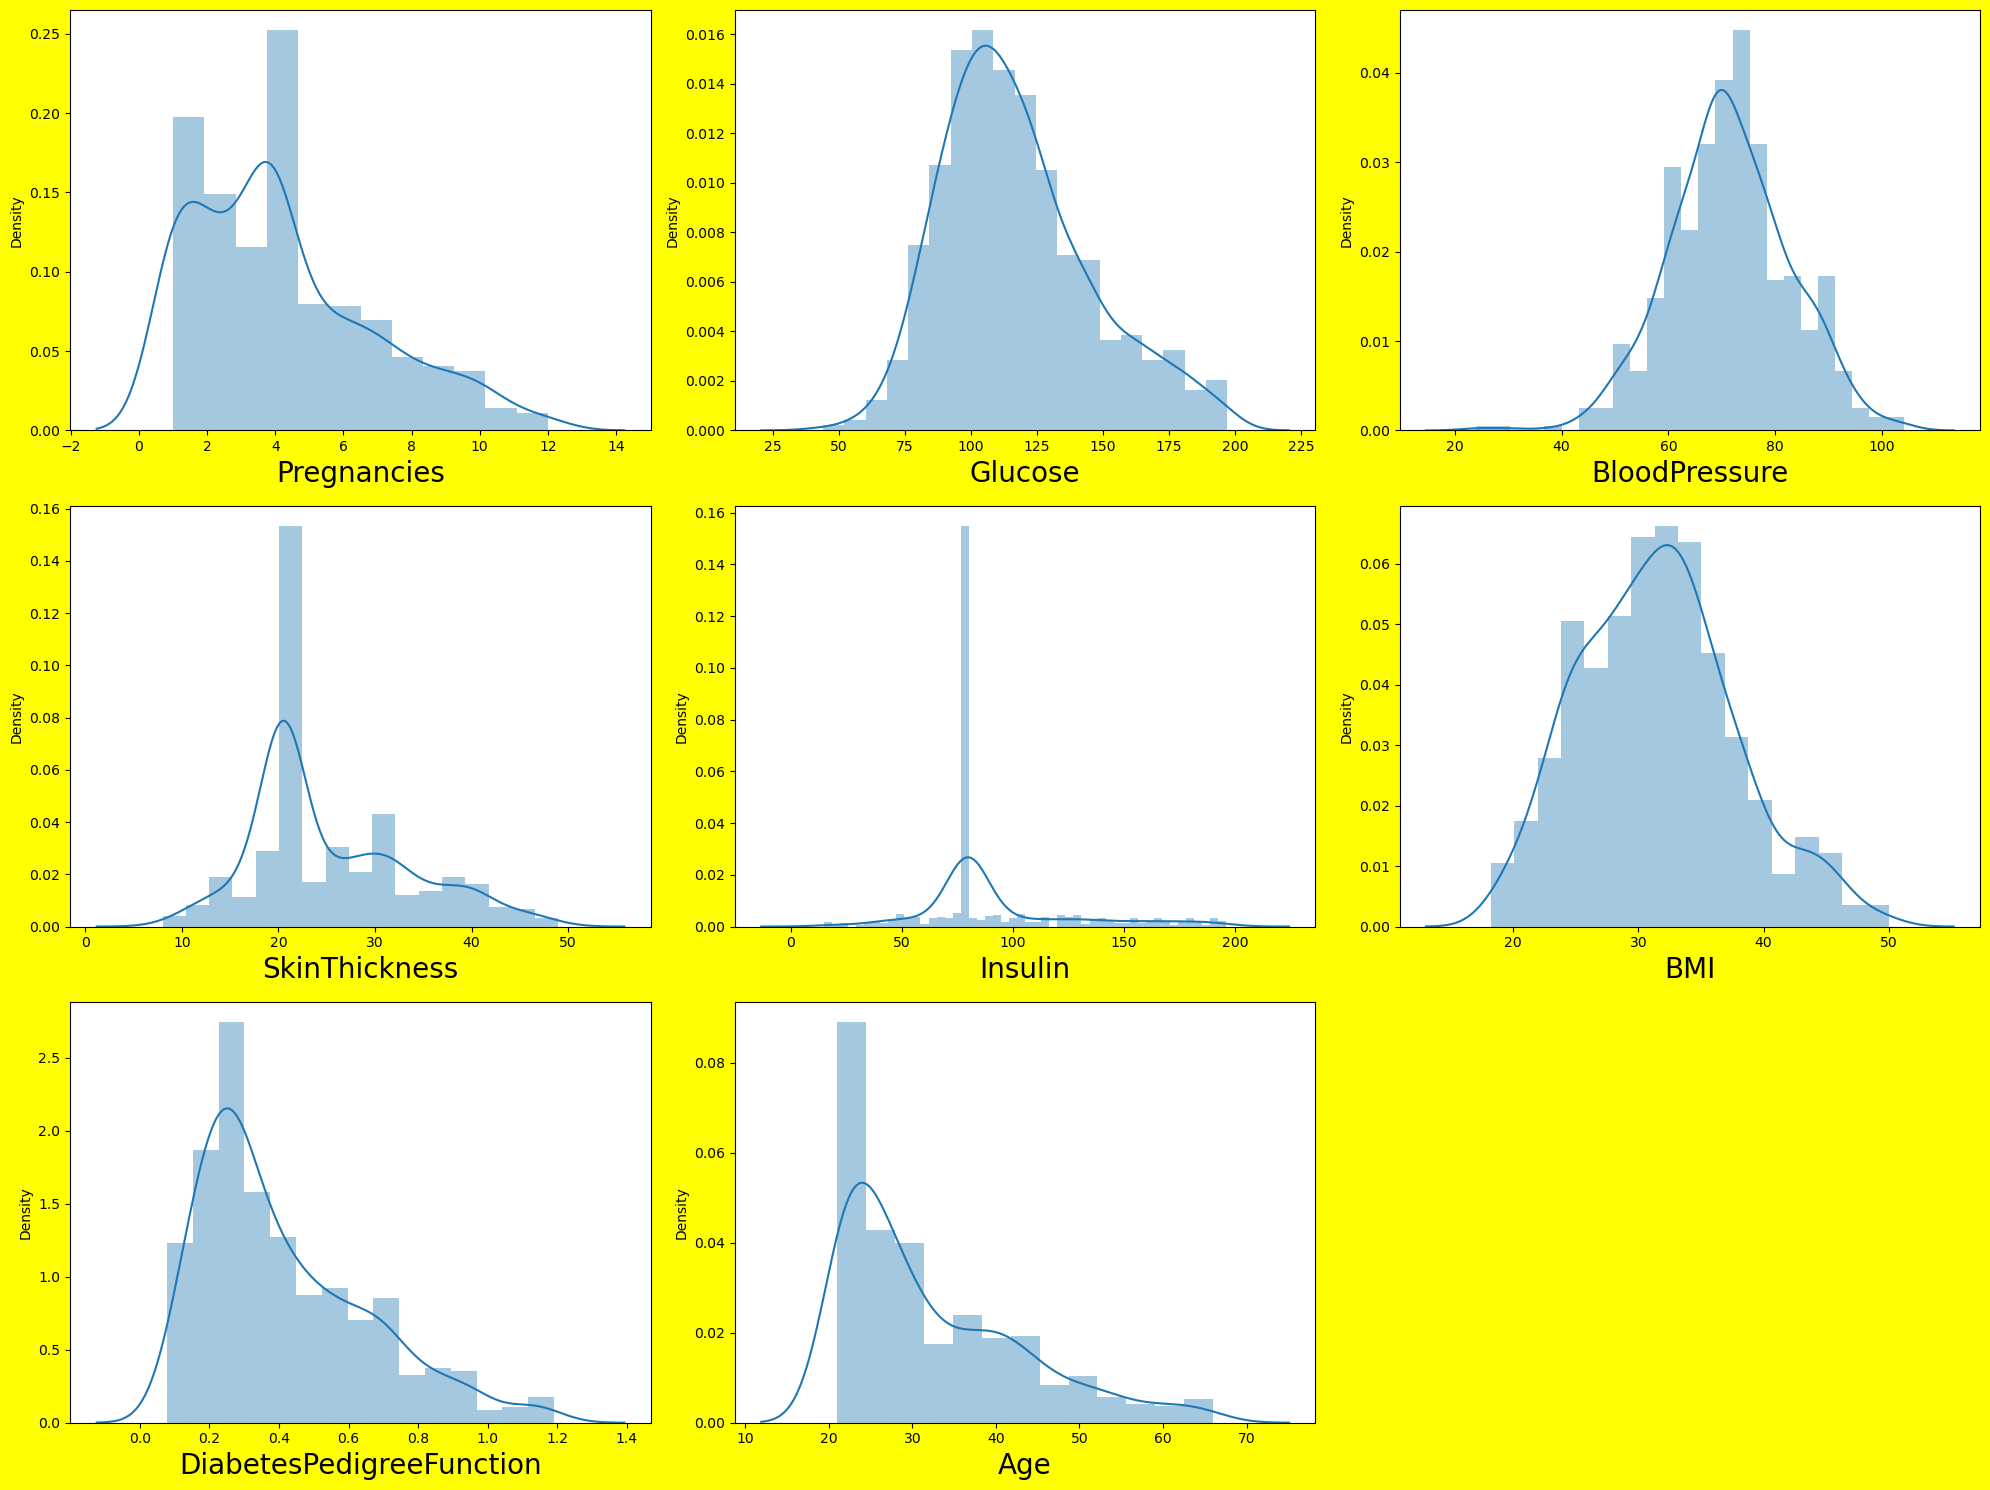

In [22]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1   
plt.tight_layout() 

# Another method,to remove outliers by using Z-score(standard normal distribution)

In [23]:
from scipy.stats import zscore

z_score = zscore(df)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.8).all(axis=1)

df = df[filtering_entry]
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,4.082650,115.712585,71.130560,24.912811,89.494018,31.328351,0.399601,31.263345,0.293594
std,2.596139,27.393851,10.713018,7.969973,30.910366,6.140284,0.225349,9.930689,0.455814
min,1.000000,44.000000,44.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,96.000000,64.000000,20.536458,79.799479,26.725000,0.233250,23.000000,0.000000
50%,3.845052,111.000000,70.000000,20.536458,79.799479,31.200000,0.331500,28.000000,0.000000
75%,6.000000,130.000000,78.000000,30.000000,90.000000,35.100000,0.546750,37.750000,1.000000
max,11.000000,195.000000,102.000000,47.000000,185.000000,48.300000,1.095000,62.000000,1.000000


C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

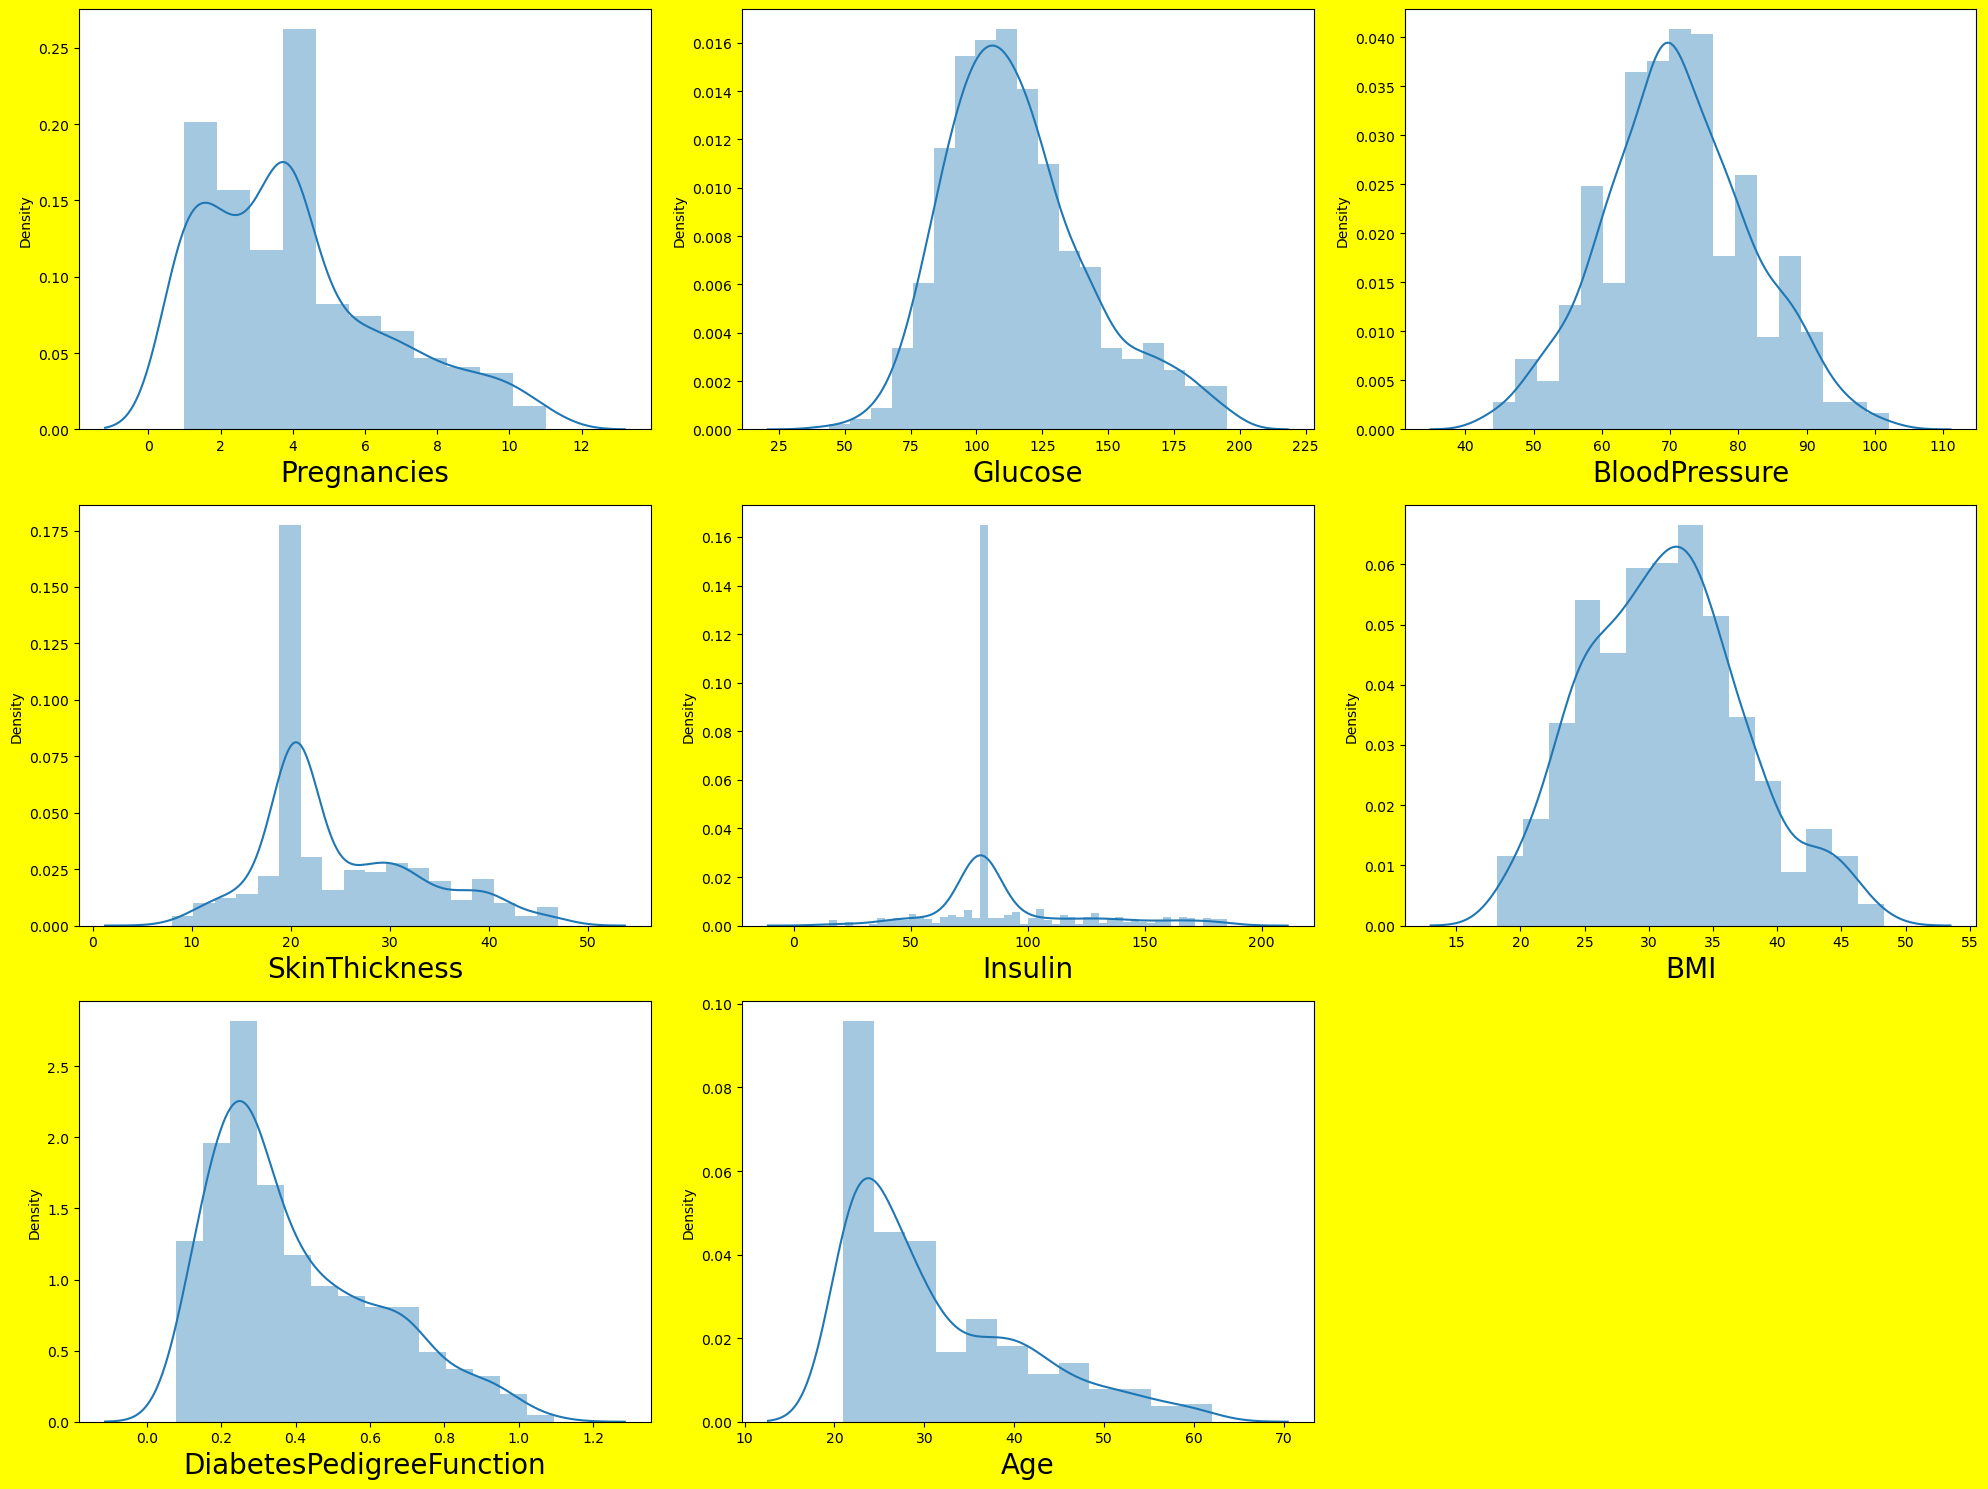

In [24]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1   
plt.tight_layout() 

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

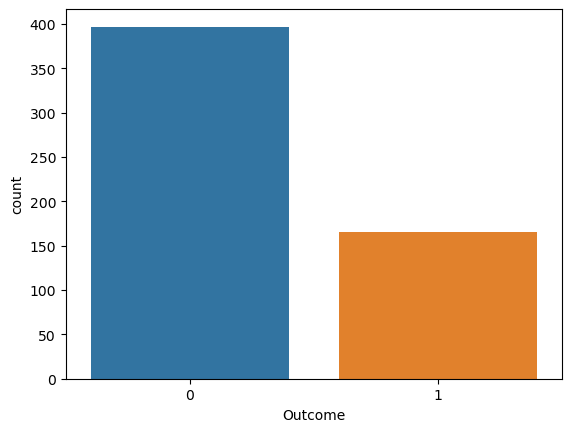

In [25]:
sns.countplot(df['Outcome'],label = 'count')

In [26]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [27]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30


In [28]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

before  we fit our data to model,let's visualize the relationship between our independent variable and the categories

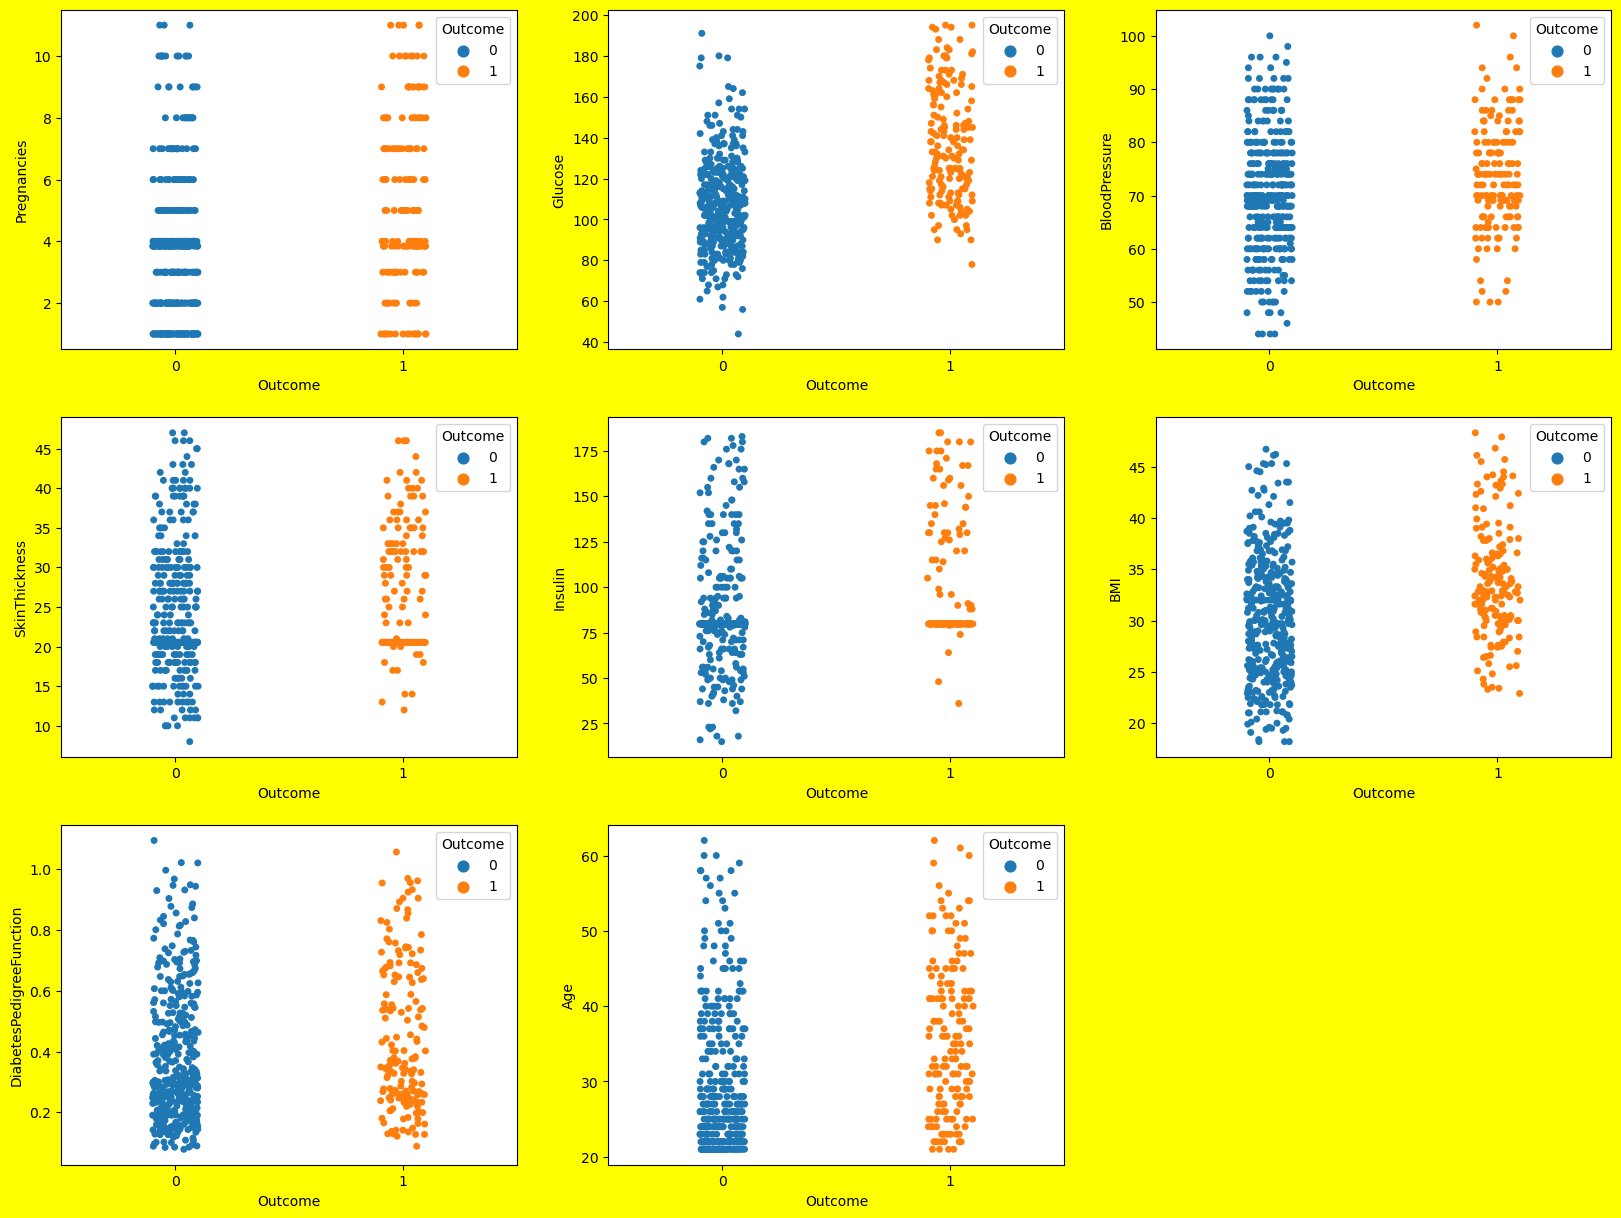

In [29]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=df[column],hue=y)     
        
    plotnumber+=1   
plt.show() 

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X_scaled.shape

(562, 8)

# check multicolinearity usinf VIF(Variance inflation factor)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,vif,Features
0,1.446788,Pregnancies
1,1.238784,Glucose
2,1.229842,BloodPressure
3,1.356959,SkinThickness
4,1.190916,Insulin
5,1.415915,BMI
6,1.027908,DiabetesPedigreeFunction
7,1.583754,Age


# In above all the VIF value is less than 5 and are very low then their is no multicolinearity.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [34]:
X_train.shape

(421, 8)

In [35]:
X_test.shape

(141, 8)

In [36]:
def metric(model, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred_train = model.predict(X_train)
        
        print("\n======================Train Result======================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
    
    else:
        y_pred_test = model.predict(X_test)
        
        print("\n======================Test Result======================")
        
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
        
        print('\n\n Test Classification Report \n' , classification_report(y_test, y_pred_test, digits=2))


In [37]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [38]:
metric(model, X_train, X_test, y_train, y_test, train=True)

metric(model, X_train, X_test, y_train, y_test, train=False)


======================Train Result======================
Accuracy Score: 79.10%

======================Test Result======================
Accuracy Score: 83.69%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       101
           1       0.74      0.65      0.69        40

    accuracy                           0.84       141
   macro avg       0.81      0.78      0.79       141
weighted avg       0.83      0.84      0.83       141

